In [194]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
import requests
import datetime

In [195]:
# Carregando os dados

df_retail = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_brutos\australia_retail.xlsx')
display(df_retail)

,Type of Business,Business Name,Location,Opening Time,Closing Time,Most Traffic Occurring Time,Maximum Sales Time,Employee Scheduling,Maximum Sales Time.1,Daily Average Sales,Weekly Average Sales,Popular Products Sold,Customer Demographics,Payment Methods,Customer Satisfaction,Store Profitability,Employee Satisfaction,Labour Law Complaints
0,Clothing,Fashion Hub,Melbourne,9:00 AM,8:00 PM,19:00 PM,16:00 PM,Overstaffed,8:00 PM,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,9:00 AM,10:00 PM,14:00 PM,18:00 PM,Understaffed,5:00 PM,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,8:00 AM,9:00 PM,16:00 PM,19:00 PM,Overstaffed,6:00 PM,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,9:00 AM,6:00 PM,18:00 PM,19:00 PM,Overstaffed,7:00 PM,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,7:00 AM,8:00 PM,15:00 PM,21:00 PM,Understaffed,6:00 PM,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,7:00 AM,8:00 PM,18:00 PM,17:00 PM,Overstaffed,8:00 PM,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,8:00 AM,6:00 PM,11:00 AM,17:00 PM,Understaffed,5:00 PM,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,7:00 AM,9:00 PM,12:00 PM,20:00 PM,Overstaffed,8:00 PM,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,8:00 AM,7:00 PM,20:00 PM,17:00 PM,Understaffed,7:00 PM,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [196]:
# Tipo do objeto
print(type(df_retail))

<class 'pandas.core.frame.DataFrame'>


In [197]:
# Tamanho do df_retail
df_retail.shape

(500, 18)

In [198]:
# Traduzindo os nomes das colunas para o português
df_retail = df_retail.rename(columns={
    "Type of Business": "tipo_negocio",
    "Business Name": "loja_negocio",
    "Location": "localidade",
    "Opening Time": "horario_abertura",
    "Closing Time": "horario_fechamento",
    "Most Traffic Occurring Time": "horario_maior_fluxo",
    "Maximum Sales Time": "horario_pico_vendas",
    "Maximum Sales Time.1": "horario_pico_vendas_2",
    "Employee Scheduling": "alocacao_funcionarios",
    "Employee Satisfaction": "satisfacao_funcionarios",
    "Daily Average Sales": "vendas_medias_diarias",
    "Weekly Average Sales": "vendas_medias_semanais",
    "Store Profitability": "lucratividade_loja",
    "Popular Products Sold": "produtos_populares",
    "Customer Demographics": "perfil_clientes",
    "Payment Methods": "metodos_pagamento",
    "Customer Satisfaction": "satisfacao_clientes",
    "Labour Law Complaints": "reclamacoes_trabalhistas"
})

# Mostrar as novas colunas
df_retail.head()

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,9:00 AM,8:00 PM,19:00 PM,16:00 PM,Overstaffed,8:00 PM,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,9:00 AM,10:00 PM,14:00 PM,18:00 PM,Understaffed,5:00 PM,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,8:00 AM,9:00 PM,16:00 PM,19:00 PM,Overstaffed,6:00 PM,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,9:00 AM,6:00 PM,18:00 PM,19:00 PM,Overstaffed,7:00 PM,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,7:00 AM,8:00 PM,15:00 PM,21:00 PM,Understaffed,6:00 PM,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No


In [199]:
# Informações gerais sobre o df
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo_negocio              500 non-null    object 
 1   loja_negocio              500 non-null    object 
 2   localidade                500 non-null    object 
 3   horario_abertura          500 non-null    object 
 4   horario_fechamento        500 non-null    object 
 5   horario_maior_fluxo       500 non-null    object 
 6   horario_pico_vendas       500 non-null    object 
 7   alocacao_funcionarios     500 non-null    object 
 8   horario_pico_vendas_2     500 non-null    object 
 9   vendas_medias_diarias     500 non-null    float64
 10  vendas_medias_semanais    500 non-null    float64
 11  produtos_populares        500 non-null    object 
 12  perfil_clientes           500 non-null    object 
 13  metodos_pagamento         500 non-null    object 
 14  satisfacao

In [200]:
# Estatísticas gerais
df_retail.describe()

,vendas_medias_diarias,vendas_medias_semanais
count,500.000000,500.000000
mean,2748.050040,21274.825640
std,1163.109471,9397.319614
min,494.540000,3865.030000
25%,1868.622500,13966.630000
50%,2785.035000,23320.345000
75%,3698.420000,29865.052500
max,5199.460000,37754.760000


In [201]:
# Verificando valores nulos
df_retail.isnull().sum()

tipo_negocio                0
loja_negocio                0
localidade                  0
horario_abertura            0
horario_fechamento          0
horario_maior_fluxo         0
horario_pico_vendas         0
alocacao_funcionarios       0
horario_pico_vendas_2       0
vendas_medias_diarias       0
vendas_medias_semanais      0
produtos_populares          0
perfil_clientes             0
metodos_pagamento           0
satisfacao_clientes         0
lucratividade_loja          0
satisfacao_funcionarios     0
reclamacoes_trabalhistas    0
dtype: int64

In [202]:
maior_media_loja = df_retail[['loja_negocio', 'vendas_medias_diarias']].groupby('loja_negocio').sum()
display(maior_media_loja.sort_values(by='vendas_medias_diarias', ascending=False))

,vendas_medias_diarias
loja_negocio,
Fashion Hub,400995.38
Tech Store,349798.45
Home Essentials,258493.82
Book Nook,247030.49
Green Grocers,117706.88


In [203]:
media_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].mean().round(2).reset_index()
display(round(media_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False)),2)

,localidade,vendas_medias_diarias
4,Sydney,3068.0
1,Brisbane,2898.0
2,Melbourne,2687.0
0,Adelaide,2506.0
3,Perth,2460.0


2

In [204]:
max_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].max().round(2).reset_index()
display(max_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False))

,localidade,vendas_medias_diarias
4,Sydney,5199.46
2,Melbourne,5103.27
1,Brisbane,4957.99
0,Adelaide,4574.39
3,Perth,4093.49


In [205]:
min_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].min().round(2).reset_index()
display(min_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False))

,localidade,vendas_medias_diarias
3,Perth,1401.10
1,Brisbane,885.57
0,Adelaide,753.05
4,Sydney,595.51
2,Melbourne,494.54


In [206]:
# Juntando as vendas medias diarias por localidade
df_vendas_localidade = (media_vendas_localidade.merge(min_vendas_localidade, on='localidade', suffixes=('_media', '_min'))).merge(max_vendas_localidade, on='localidade').rename(columns={'vendas_medias_diarias': 'vendas_medias_diarias_max'})
df_vendas_localidade = df_vendas_localidade.sort_values(by='vendas_medias_diarias_media', ascending=False)
display(df_vendas_localidade)

,localidade,vendas_medias_diarias_media,vendas_medias_diarias_min,vendas_medias_diarias_max
4,Sydney,3068.43,595.51,5199.46
1,Brisbane,2898.42,885.57,4957.99
2,Melbourne,2687.14,494.54,5103.27
0,Adelaide,2505.73,753.05,4574.39
3,Perth,2459.98,1401.10,4093.49


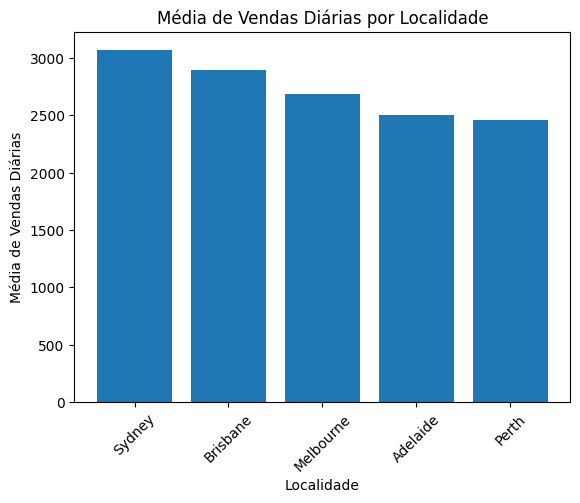

In [207]:
# Gráfico de barras da média de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_media'])
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45)
plt.show()

A cidade mais forte em vendas, em média, é Sidney

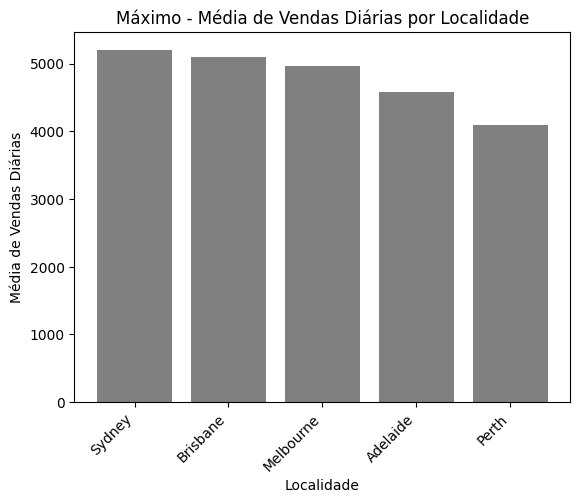

In [208]:
# Gráfico de barras do máximo de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_max'].sort_values(ascending=False),
        color='gray')
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Máximo - Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45, ha='right')
plt.show()

A cidade com maior potencial de vendas, é Sidney, seguida por Brisbane, pelo raciocínio de máximo

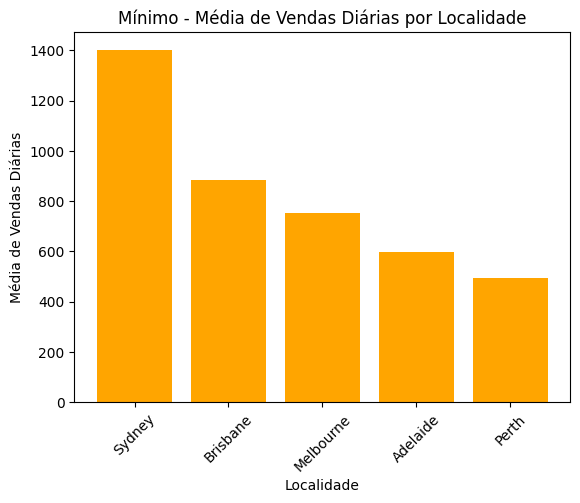

In [209]:
# Gráfico de barras do mínimo de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_min'].sort_values(ascending=False),
        color='orange')
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Mínimo - Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45)
plt.show()

A cidade com menor potencial, é Perth, baseado no mínimo de média de vendas diárias por localidade.

In [210]:
df_vendas_localidade['amplitude'] = df_vendas_localidade['vendas_medias_diarias_max'] - df_vendas_localidade['vendas_medias_diarias_min']
display(round(df_vendas_localidade),2)

,localidade,vendas_medias_diarias_media,vendas_medias_diarias_min,vendas_medias_diarias_max,amplitude
4,Sydney,3068.0,596.0,5199.0,4604.0
1,Brisbane,2898.0,886.0,4958.0,4072.0
2,Melbourne,2687.0,495.0,5103.0,4609.0
0,Adelaide,2506.0,753.0,4574.0,3821.0
3,Perth,2460.0,1401.0,4093.0,2692.0


2

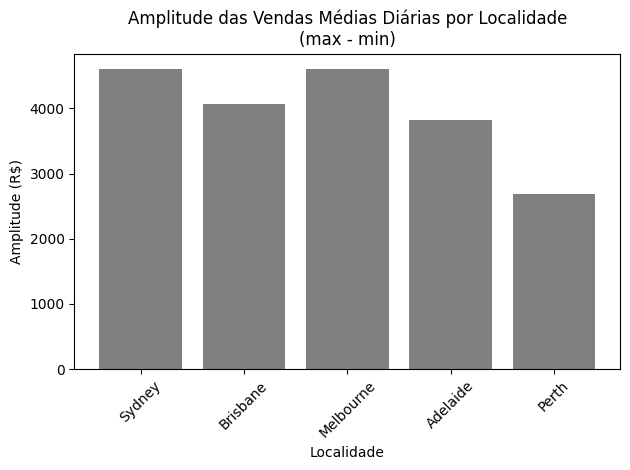

In [214]:
# Gráfico de barras - amplitude de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['amplitude'], 
        color='gray')
plt.title('Amplitude das Vendas Médias Diárias por Localidade\n(max - min)')
plt.xlabel('Localidade')
plt.ylabel('Amplitude (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sydney e Melbourne apresentam as maiores amplitudes de vendas diárias, o que mostra que tem maior equilíbrio.

Brisbane também tem uma ampliture alta, mas menor que Sydney e Melbourne.

Adelaide tem uma amplitude intermediária.

Perth tem uma menor amplitude, é mais estável.

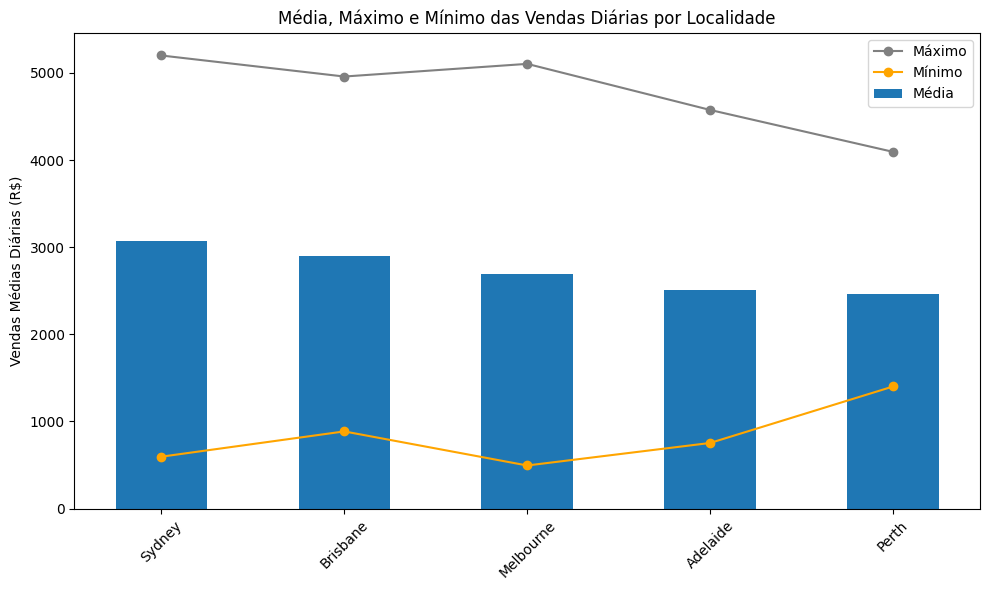

In [216]:
df_plot = df_vendas_localidade.sort_values(
    by='vendas_medias_diarias_media',
    ascending=False
)

x = np.arange(len(df_plot))

med = df_plot['vendas_medias_diarias_media']
minv = df_plot['vendas_medias_diarias_min']
maxv = df_plot['vendas_medias_diarias_max']

plt.figure(figsize=(10, 6))

# Barras da média
plt.bar(x, med, width=0.5, label='Média')

# Linha do máximo
plt.plot(x, maxv, marker='o', label='Máximo', color='gray')

# Linha do mínimo
plt.plot(x, minv, marker='o', label='Mínimo', color='orange')

plt.xticks(x, df_plot['localidade'], rotation=45)
plt.ylabel('Vendas Médias Diárias (R$)')
plt.title('Média, Máximo e Mínimo das Vendas Diárias por Localidade')
plt.legend()
plt.tight_layout()
plt.show()

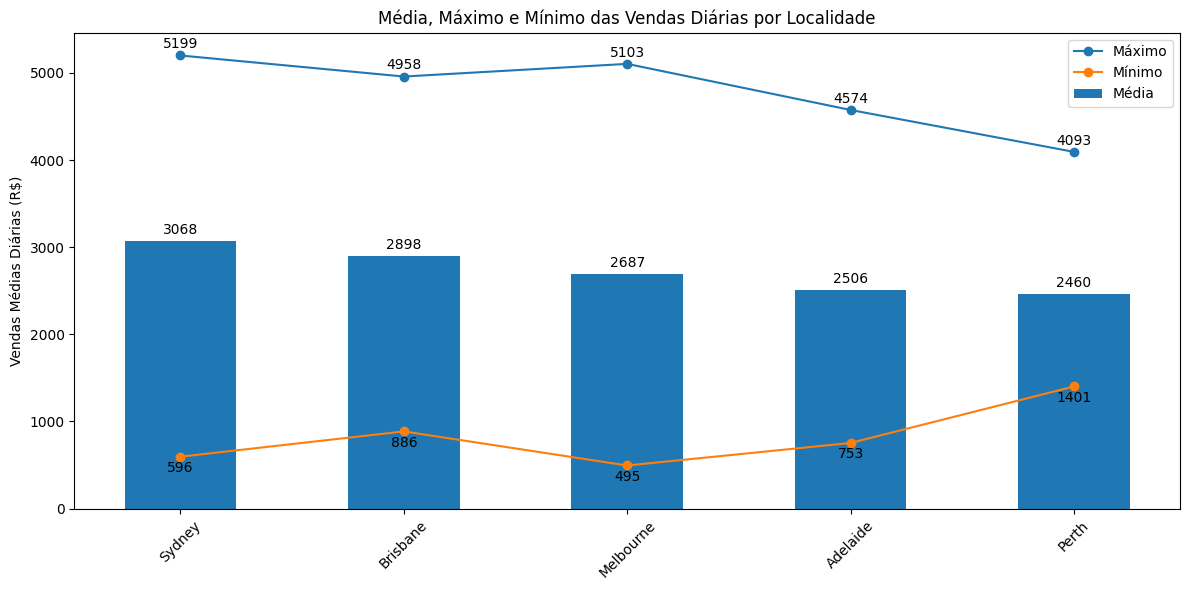

In [ ]:
# Média, Máximo e Mínimo das Vendas Diárias por Localidade

# Ordenar o dataframe pela média
df_plot = df_vendas_localidade.sort_values(
    by='vendas_medias_diarias_media',
    ascending=False
)

x = np.arange(len(df_plot))

med = df_plot['vendas_medias_diarias_media']
minv = df_plot['vendas_medias_diarias_min']
maxv = df_plot['vendas_medias_diarias_max']

plt.figure(figsize=(12, 6))

# Barras (média)
plt.bar(x, med, width=0.5, label='Média')

# Linha do máximo
plt.plot(x, maxv, marker='o', label='Máximo')

# Linha do mínimo
plt.plot(x, minv, marker='o', label='Mínimo')

# Anotação dos valores em cada ponto da linha de MÁXIMO
for i, v in enumerate(maxv):
    plt.text(i, v + 50,                
             f'{v:.0f}',               
             ha='center', va='bottom')

# Anotação dos valores em cada ponto da linha de MÍNIMO
for i, v in enumerate(minv):
    plt.text(i, v - 50,                
             f'{v:.0f}',
             ha='center', va='top')

# Anotação dos valores da MÉDIA (em cima da barra)
for i, v in enumerate(med):
    plt.text(i, v + 50,
             f'{v:.0f}',
             ha='center', va='bottom')

plt.xticks(x, df_plot['localidade'], rotation=45)
plt.ylabel('Vendas Médias Diárias (R$)')
plt.title('Média, Máximo e Mínimo das Vendas Diárias por Localidade')
plt.legend()
plt.tight_layout()
plt.show()